In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

### Import and General Data Info

Read csv file into a pandas dataframe (df)

In [30]:
df = pd.read_csv('./datasets/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We get general insights from the data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As can be seen above, there are 32,561 entries in each category with no null or missing entries

In [32]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

## Insights

##### Number of People of Each Race Represented in the Data

First we get the number of people of each race in the data

First we get number of people by race in the data

In [46]:
# df.groupby('race').race.count() ## Alt approach
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Then we create a race count dataframe/table (df_race) from which to visualize the data

In [48]:
df_race = pd.DataFrame(df.groupby('race').race.count())
df_race = df_race.rename(columns={0:'race', 'race':'count'}).sort_values('count', ascending=False).reset_index()
df_race

,race,count
0,White,27816
1,Black,3124
2,Asian-Pac-Islander,1039
3,Amer-Indian-Eskimo,311
4,Other,271


Now we visualize the race distribution in the dataset

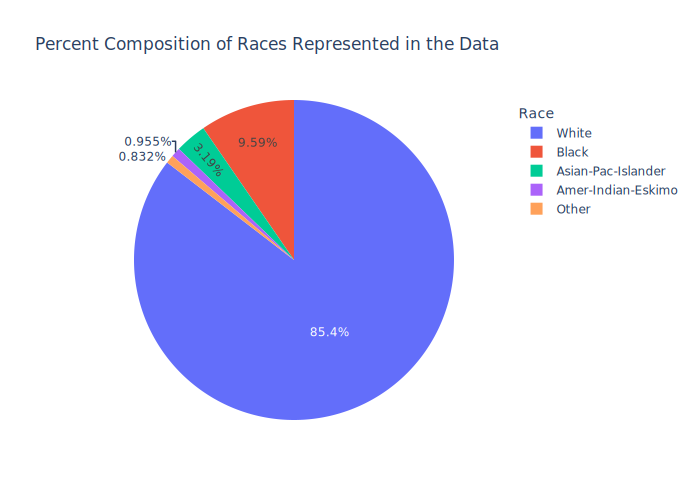

In [54]:
fig1_1 = px.pie(df_race, values='count', names='race', title="Percent Composition of Races Represented in the Data").update_layout(legend=dict(title="Race"))
fig1_1

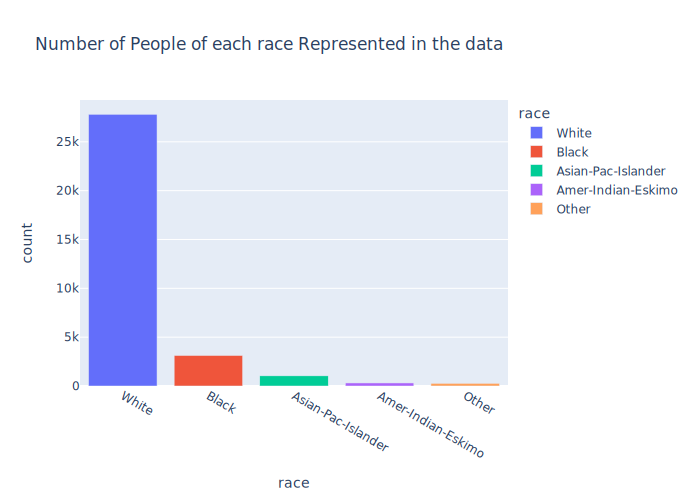

In [57]:
fig1_2 = px.bar(df_race, x='race', y='count', color='race', title="Number of People of each race Represented in the data")
fig1_2

As can be observed above, an overwhelming number of people in the data are White accounting for over 85% of the races represented in the data. this is followed by just under 9.6% Black representation and about 3.2% Asians repesented in the data.

#### Number of each sex represented in the dataset

In [ ]:
# df.groupby('sex').sex.count() ## Alt approach
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

First we create a dataframe table illustrating the number of each sex (df_sex) represented in the data

In [53]:
df_sex = pd.DataFrame(df.groupby('sex').sex.count())
df_sex = df_sex.rename(columns={0:'sex', 'sex':'count'}).sort_values('count', ascending=False).reset_index()
df_sex

,sex,count
0,Male,21790
1,Female,10771


Then we can visualize the sex composition in the data

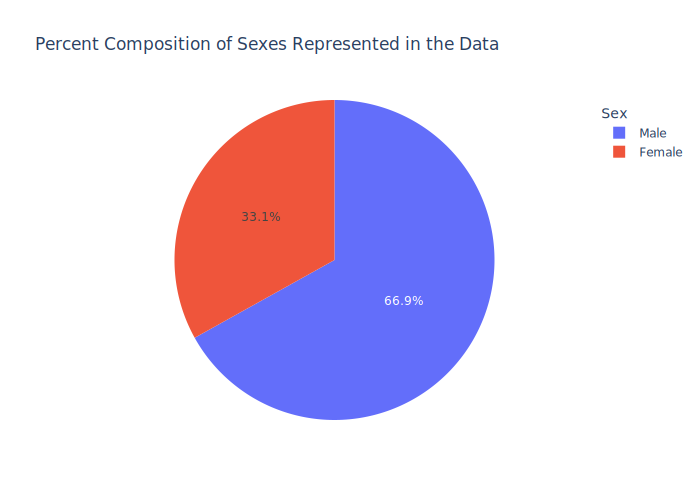

In [55]:
fig2_1 = px.pie(df_sex, values='count', names='sex', title="Percent Composition of Sexes Represented in the Data").update_layout(legend=dict(title="Sex"))
fig2_1

##### Average Age of each Sex

Average age of men

In [ ]:
# df.loc[df['sex'] == 'Male'].age.mean() ## Alt approach
df[df['sex'] == 'Male'].age.mean()

39.43354749885268

Average age of women

In [52]:
df[df['sex'] == 'Female'].age.mean()

36.85823043357163

In [ ]:
# Percentage of people who have a Bachelor's degree

# bachelors_count = df.loc[df['education'] == 'Bachelors', 'education'].value_counts()
# bachelors_count = len(df[df['education'] == 'Bachelors'])
bachelors_count = (df['education'] == 'Bachelors').sum()
bachelors_count/df.shape[0] * 100

16.44605509658794

In [ ]:
# Percentage of people with advanced education (Bachelors, Masters, or Doctorate) who make more than 50K

# len(df[df['education'].map(lambda x: x == ('Bachelors' or  'Masters' or 'Doctorate'))])
# df.loc[df['education'] == ('Bachelors' or 'Masters' or 'Doctorate'), 'salary'].value_counts(dropna=False)
num_high_bachelors_earners = df[(df.education == ('Bachelors')) & (df.salary == '>50K')].salary.count()
num_high_masters_earners = df[(df.education == 'Masters') & (df.salary == '>50K')].salary.count()
num_high_doctorate_earners = df[(df.education == 'Doctorate') & (df.salary == '>50K')].salary.count()

num_high_advanced_educated_earners = num_high_bachelors_earners + num_high_masters_earners + num_high_doctorate_earners

num_high_advanced_educated = df[df.education == 'Bachelors'].salary.count() + df[df.education == 'Masters'].salary.count() + df[df.education == 'Doctorate'].salary.count()

percent_high_advanced_educated_earners = num_high_advanced_educated_earners/num_high_advanced_educated * 100
percent_high_advanced_educated_earners

46.535843011613935

In [ ]:
# Percentage of people without advanced education who make more than 50K
num_non_advanced_edcated = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate')].salary.count()

num_high_non_advanced_educated_earners = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate') & (df['salary'] == '>50K')].salary.count()


percent_high_non_advanced_educated_earners = num_high_non_advanced_educated_earners/num_non_advanced_edcated * 100
percent_high_non_advanced_educated_earners

17.3713601914639

In [ ]:
num_low_non_advanced_educated_earners = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate') & (df['salary'] != '>50K')].salary.count()

percent_low_non_advanced_educated_earners = num_low_non_advanced_educated_earners/num_non_advanced_edcated * 100

percent_low_non_advanced_educated_earners

82.6286398085361

In [ ]:
# Minimum number of hours a person works per week
min_work_hours = df['hours-per-week'].min()
min_work_hours

1

##### Additional Insights

In [ ]:
# Maximum number of hours a person works per week
max_work_hours = df['hours-per-week'].max()
max_work_hours

99

In [ ]:
# Average number of hours a person works per week
df['hours-per-week'].mean()

40.437455852092995

#### Back to the main topic

In [ ]:
# Percentage of the people who work the minimum number of hours per week who have a salary of more than 50K
num_min_workers = df[df['hours-per-week'] == min_work_hours]

num_min_workers_salary_over50 = df[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')]

percent_min_workers_salary_over50 = num_min_workers_salary_over50.salary.count()/num_min_workers.salary.count() * 100
percent_min_workers_salary_over50

10.0

In [ ]:
num_max_workers = df[df['hours-per-week'] == max_work_hours]
num_max_workers_salary_over50 = df[(df['hours-per-week'] == max_work_hours) & (df['salary'] == '>50K')]

percent_max_workers_salary_over50 = num_max_workers_salary_over50.salary.count()/num_max_workers.salary.count() * 100
percent_max_workers_salary_over50

29.411764705882355

The percentage of people working the maximum 99h per week is nearly triple that of those who work the minimum 1h.

In [ ]:
# Percentage of people earning salary over 50k by country

# num_salary_over50_by_country = df[df['salary'] == '>50K']['native-country'].value_counts()
num_salary_over50_by_country = df[df['salary'] == '>50K'].groupby('native-country')['salary'].count()

num_by_country = df['native-country'].value_counts()
percent_salary_over50_by_country = num_salary_over50_by_country/num_by_country * 100
percent_salary_over50_by_country.sort_values(ascending=False)

Iran                          41.860465
France                        41.379310
India                         40.000000
Taiwan                        39.215686
Japan                         38.709677
Yugoslavia                    37.500000
Cambodia                      36.842105
Italy                         34.246575
England                       33.333333
Canada                        32.231405
Germany                       32.116788
Philippines                   30.808081
Hong                          30.000000
Greece                        27.586207
China                         26.666667
Cuba                          26.315789
?                             25.042882
Scotland                      25.000000
United-States                 24.583476
Hungary                       23.076923
Ireland                       20.833333
South                         20.000000
Poland                        20.000000
Thailand                      16.666667
Ecuador                       14.285714


In [ ]:
# Country that has the highest percentage of people that earn >50K and the percentage
print(percent_salary_over50_by_country.idxmax(), percent_salary_over50_by_country.max())

Iran 41.86046511627907


In [ ]:
# Most popular occupation for those who earn >50K in India
top_demographics_over50_india = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]
top_demographics_over50_india.occupation.value_counts().idxmax()

'Prof-specialty'

In [ ]:
# Most popular occupation overall for those who earn >50K
top_demographics_over50 = (df[df['salary'] == '>50K']).occupation.value_counts().idxmax()
top_demographics_over50

'Exec-managerial'

In [ ]:
# Most popular occupation overall for those earning <=50K
top_demographics_under50 = (df[df['salary'] == '<=50K']).occupation.value_counts().idxmax()
top_demographics_under50

'Adm-clerical'

**Exec-managerial** is the most common profession among people earning more than 50K, while **Adm-clerical** is the most common among people earning 50K and less.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67830035-8b85-459b-8213-52c1ff5a6b3a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>